In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


2023-09-16 06:33:19.485211: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 06:33:19.516291: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 06:33:19.516954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 06:33:20.427987: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


170498071/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

50000 training images and 10000 test images

In [7]:
X_test.shape

(10000, 32, 32, 3)

y_train is a 2D array convert this to now 1D array

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

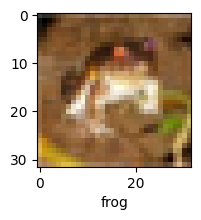

In [12]:
plot_sample(X_train, y_train, 0)

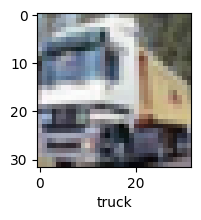

In [13]:
plot_sample(X_train, y_train, 1)

Normalizing traning data from 0 to 1. RGB channels range from 0 to 255

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit Model and Iterations

In [17]:
fitted = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


2023-09-16 06:33:44.536242: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1561/1563 [============================>.] - ETA: 0s - loss: 1.4854 - accuracy: 0.4657

2023-09-16 06:34:03.272933: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 [==============================] - 20s 12ms/step - loss: 1.4848 - accuracy: 0.4659 - val_loss: 1.2165 - val_accuracy: 0.5731
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1132 - accuracy: 0.6083 - val_loss: 1.0362 - val_accuracy: 0.6334
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9868 - accuracy: 0.6529 - val_loss: 1.0318 - val_accuracy: 0.6443
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8990 - accuracy: 0.6883 - val_loss: 0.9659 - val_accuracy: 0.6683
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8375 - accuracy: 0.7092 - val_loss: 0.9315 - val_accuracy: 0.6776
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7801 - accuracy: 0.7288 - val_loss: 0.9470 - val_accuracy: 0.6712
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7305 - accuracy: 0.7450 - val_loss: 0.9371 - val_accura

Evaluate the Model

In [18]:
test_loss, test_accuracy = cnn.evaluate(X_test,y_test)

  1/313 [..............................] - ETA: 5s - loss: 0.5949 - accuracy: 0.7812

 27/313 [=>............................] - ETA: 1s - loss: 0.8925 - accuracy: 0.7049

2023-09-16 06:36:46.448595: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 4ms/step - loss: 0.9317 - accuracy: 0.6972


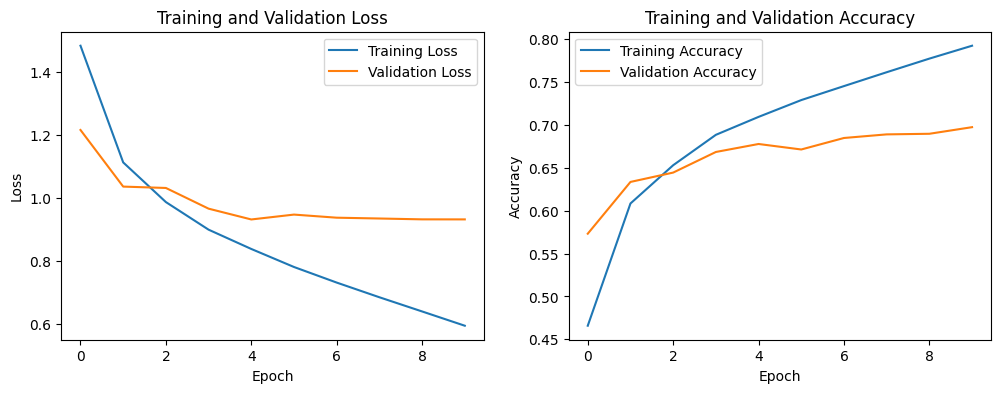

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fitted.history['loss'], label='Training Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(fitted.history['accuracy'], label='Training Accuracy')
plt.plot(fitted.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()